# Hierarchical clustering

In this notebook, we shall explore **hierarchical clustering** methods by using the [dataset](https://salaries.ai-jobs.net/download/) from the jobseeker website [ai-jobs](https://ai-jobs.net/). The purpose is to cluster job vacancies in the Data Science field by experience levels.

**Hierarchical clustering** determines cluster assignments by building a **hierarchy**, which can be made by either bottom-up (*agglomerative*) or top-down (*divisive*) approaches. These methods are all **deterministic**, which means if we execute them repeatedly using the same input, we will obtain the same result.

## Libraries

In [17]:
#----- Data and numerical operations -----#
import numpy as np
import pandas as pd

#----- Graph and Charts -----#
from matplotlib import pyplot as plt
import seaborn as sns

#----- Machine learning and statistics -----#
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

#----- Scripts -----#
import sys
sys.path.insert(0, 'scripts')

import data_wrangling as dw
import dataviz

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data wrangling

In [12]:
df, scaled_df = dw.read_dataset('dataset.csv')
dataviz.display_side_by_side(df, scaled_df)

,EN,MI,SE
job_title,,,
AI Scientist,7,3,1
Analytics Engineer,1,7,29
BI Data Analyst,5,6,0
Data Analyst,24,44,111
Data Architect,0,3,34
Data Engineer,18,81,199
Data Science Manager,0,4,21
Data Scientist,36,84,206
ETL Developer,0,2,8


## Agglomerative clustering

The **agglomerative clustering** is a bottom-up **hierarchical clustering** which initially assumes that each observation is a cluster (bottom). Then, we merge the closest clusters until there is only one cluster (up).

### Distance metric

We shall build and visualize (heatmap) the **proximity matrix** in order to analyze **distance metrics**. A proximity matrix is essentially a table with the distances between the observations and a distance is a measure of **dissimilarity**. The main properties of the proximity matrix are

- Its diagonal elements are all zeros;
- It is symmetric by the transpose operation. 

Choosing a proper distance measure is the most fundamental task in any clustering method. There are many possible distances, which one has advantages and disadvantages (check [this article](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa) to understand some of the most relevant distances). There are some features of the data we must take into account to choose a distance measure:

1. All variables are equally relevant;
2. We are mainly concerned with the magnitude differences between observations;
3. The variables space has low dimensionality (3 dimensions: EN, MI, and SE).

Let us consider both $ x_i $ and $ y_i $ arbitrary observations of the $i$-th variables. Assuming the features described above, we chose to analyze the following distance measures:

<table>
    <tr>
        <th style="text-align:center;">Euclidean</th>
        <th style="text-align:center;">Manhattan</th>
        <th style="text-align:center;">Chebyshev</th>
    </tr>
    <tr>
        <td> $$ d(x_i, y_i) = \sum_{i = 0}^{3} \sqrt{(x_i - y_i)^{2}} $$ </td>
        <td> $$ d(x_i, y_i) = \sum_{i = 0}^{3} |x_i - y_i| $$ </td>
        <td> $$ d(x_i, y_i) = \max_i |x_i - y_i| $$ </td>
    </tr>
<table>

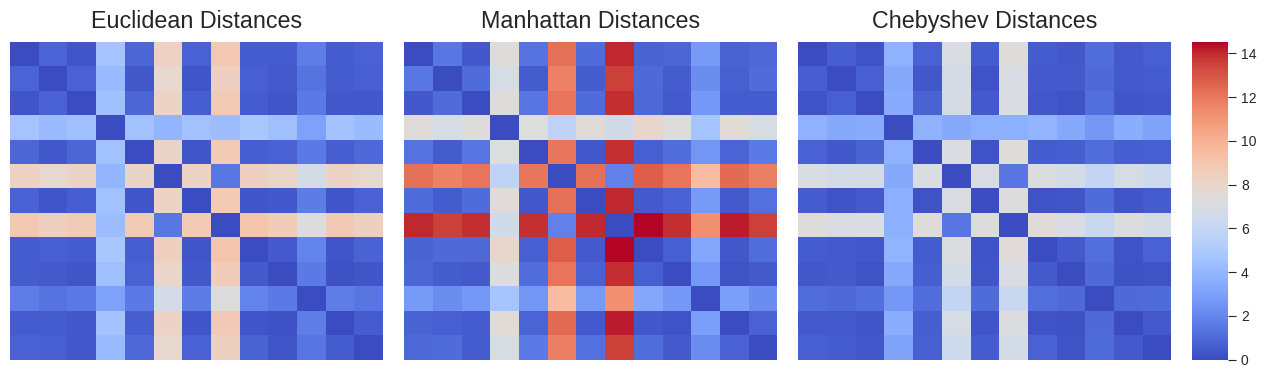

In [13]:
#---- Proximity Matrixes ----#

distances_names = ['euclidean', 'manhattan', 'chebyshev']
proximity_matrices = np.array([pairwise_distances(scaled_df, metric = dist) for dist in distances_names])
max_distance = np.max(proximity_matrices)

#----- Figure and Axes ------#

fig = plt.figure(figsize = (13,4), dpi = 100)
gs = fig.add_gridspec(nrows = 1, ncols = 22)

axs = [
    fig.add_subplot(gs[0, 0:7]),    # Euclidian distance
    fig.add_subplot(gs[0, 7:14]),   # Manhattan distance
    fig.add_subplot(gs[0, 14:21]),  # Chebyshev distance
    fig.add_subplot(gs[0, 21]),     # Colorbar
]

#---------- Style -----------#

plt.style.use('seaborn-ticks')
plt.rcParams.update({
    'font.size': 14
})

#-- Plot proximity matrices --#

for i in range(3):
    # Heatmap
    sns.heatmap(
        proximity_matrices[i], 
        ax = axs[i],
        xticklabels = False,
        yticklabels = False,
        cmap = sns.color_palette("coolwarm", as_cmap=True),
        cbar_ax = axs[-1],
        vmin = 0,
        vmax = max_distance
    )

    axs[i].set_title(distances_names[i].capitalize() + ' Distances', pad = 10)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    

#----- Show and/or save figure -----#

plt.tight_layout()
plt.savefig('images/hierarchical/distance_metrics.png', dpi = 100)

The Euclidean, Manhattan, and Chebyshev distances are very similar. Indeed, these distances came from the same distance measure (Minkowski distance) and, for one-dimensional data, they are all the same. For multi-dimensional data, the Euclidean and Chebyshev distances are less sensitive to differences in more than one variable than the Manhattan distance. We can notice this effect in the heatmaps above, in which the red and blue colours are stronger for Manhattan distances than for Euclidean and Chebyshev distances. The Manhattan distance looks better in our analysis since it treats the multi-dimensional data more equally than the others (see feature 1 listed above). However, since the data has low dimensionality, the Euclidean distance works as well. It also allows the use of the Ward method, which we shall describe further. In conclusion, we shall consider the **Euclidean distance** from now on.

In [14]:
proximity_matrix = pd.DataFrame(pairwise_distances(scaled_df, metric = 'euclidean'))
pd.merge(proximity_matrix, pd.DataFrame(df.index), how = 'outer', left_index = True, right_index = True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,job_title
0,0.000000,0.846026,0.313881,4.617462,0.896990,8.338128,0.698027,8.891572,0.566888,0.545136,1.660695,0.512922,0.682477,AI Scientist
1,0.846026,0.000000,0.707380,4.197847,0.387251,7.786148,0.332480,8.429370,0.648800,0.484407,1.342065,0.511655,0.632334,Analytics Engineer
2,0.313881,0.707380,0.000000,4.460130,0.876711,8.136500,0.624018,8.719071,0.557141,0.290991,1.573600,0.355100,0.387251,BI Data Analyst
3,4.617462,4.197847,4.460130,0.000000,4.483618,3.897025,4.523207,4.282562,4.795884,4.391980,3.021907,4.562012,4.150976,Data Analyst
4,0.896990,0.387251,0.876711,4.483618,0.000000,8.066251,0.296871,8.710504,0.572482,0.707402,1.587593,0.619268,0.947144,Data Architect
5,8.338128,7.786148,8.136500,3.897025,8.066251,0.000000,8.117308,1.419400,8.410483,8.012025,6.794733,8.177233,7.785070,Data Engineer
6,0.698027,0.332480,0.624018,4.523207,0.296871,8.117308,0.000000,8.759885,0.336044,0.436665,1.625944,0.326817,0.716365,Data Science Manager
7,8.891572,8.429370,8.719071,4.282562,8.710504,1.419400,8.759885,0.000000,9.042472,8.634539,7.298895,8.805797,8.390976,Data Scientist
8,0.566888,0.648800,0.557141,4.795884,0.572482,8.410483,0.336044,9.042472,0.000000,0.480367,1.874420,0.284200,0.792372,ETL Developer
9,0.545136,0.484407,0.290991,4.391980,0.707402,8.012025,0.436665,8.634539,0.480367,0.000000,1.543048,0.197421,0.316132,ML Engineer


### Linkage method

Once we define a distance metric, the next step for performing agglomerative clustering is to define a method to link clusters, which is called **linkage**. Let us consider two arbitrary cluster $u$ and $v$. We shall denotated the observations in each cluster as $u[i]$ and $v[j]$, where $ u[i] $ is a observation in the cluster $ u $ and $ v[j] $ is a observation in the cluster $ v $. Also, we shall denoted the distance between two observations as $ dist $, which depends on the chosen metric. The distance between the mentioned clusters for the main linkage methods are

<table>
        <tr>
            <th style="text-align: center;"> Method </th>
            <th style="text-align: center;"> Calculation </th>
            <th style="text-align: center;"> Features </th>
        </tr>
        <tr>
            <td style="text-align: center;"><b> Single or minimum </b></td>
            <td> $$ d(u, v) = \min_{i,j}\{dist(u[i], v[j])\} $$ </td>
            <td style="text-align: left"> This method tends to yield large clusters since it is suceptible to the <b>chaining effect</b> [1]. Also, it is good for identifing <b>non-globular data</b>, but it performs poorly on noisy data [2]. Usually, this linkage method is not a good choice unless we want to detect non-globular data. </td>
        </tr>
        <tr>
            <td style="text-align: center;"><b> Complete or maximum </b></td>
            <td> $$ d(u, v) = \max_{i,j}\{dist(u[i], v[j])\} $$ </td>
            <td style="text-align: left"> This method is less sensitive to the <b>chaining effect</b> [1], and therefore, it performs better than the single linkage method on noisy data [2]. Also, it tends to yield compact clusters of approximately the same size. Overall, it is good to find cleanly separated <b>globular data</b>.</td> 
        </tr>
        <tr>
            <td style="text-align: center;"><b> Average or UPGMA [3]</b></td>
            <td> $$ d(u, v) = \sum_{i,j} \frac{\{dist(u[i], v[j])\}}{|u| \cdot |v|} $$ </td>
            <td style="text-align: left"> This method is similar to the complete linkage but it performs better for noisy data. It is more used than the single and complete linkages. </td>
        </tr>
        <tr>
            <td style="text-align: center;"><b> Centroid </b></td>
            <td> $$ d(u, v) = \left| c_i - c_j \right| $$ </td>
            <td style="text-align: left"> The centroid linkage results somewhat similarly to the average linkage, but we must be cautious when using it since there is the possibility of <b>inversion</b>. </td>
        </tr>
        <tr>
            <td style="text-align: center;"><b> Ward </b></td>
            <td style="text-align: center"> Variance Minimization Algorithm </td>
            <td style="text-align: left"> The Ward method behaves similar to the average linkage but it is the best one for noisy data (check the the <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html">scikit-learn documentation</a>). It is said to be the most suitable method for quantitative variables. </td>
        </tr>
</table>

where $ |u| $ and $ |v| $ are the number of observations in the clusters $ u $ and $ v $ respectively, and $ c_u $ and $ c_j $ are the centroids of $ u $ and $ v $ respectively (check this [link](https://sciencing.com/approximate-mean-group-data-10041121.html) to learn how to calculate cluster centroids). 

The single and complete methods are not ideal since they do not handle well with outliers. Therefore, the average and Ward linkages seen to be the best options.

<hr>

[1] The chaining effect merge two clearly separated cluster into one.

[2] When we say that a linkage method performs poorly in noisy data, we mean that it joins outliers to distant clusters.

[3] UPGMA = Unweighted pair-group method using arithmetic averages

### Dendrogram (Scipy library)

**Dendrograms** are visual representations of the hierarchical relationship between observations. They are used to choose the **number of clusters**. We shall consider two options for the number of clusters: the first one denoted in the dendrograms as a solid vertical line and the second one denoted as a dashed vertical line.

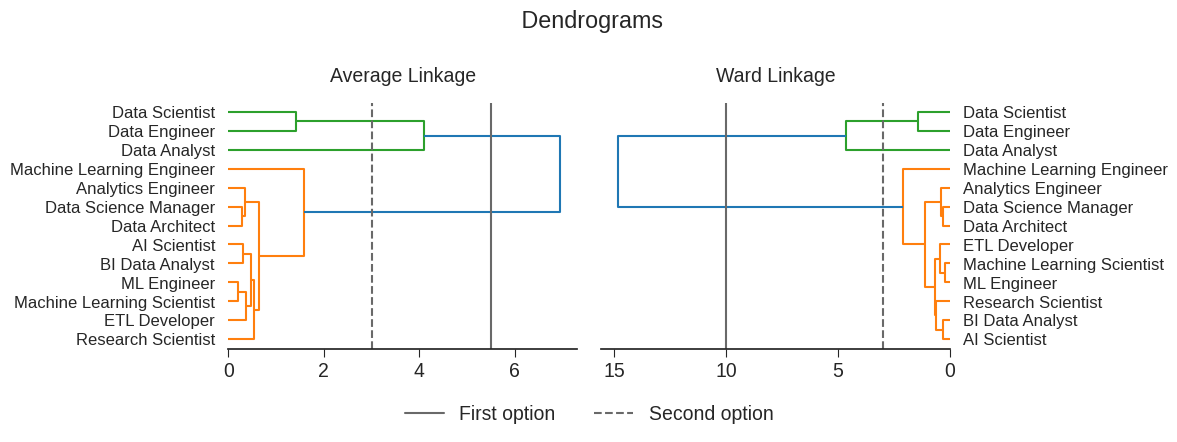

In [5]:
#----- Figure and Axes -----#

fig = plt.figure(figsize = (12, 4), dpi = 100)
gs = fig.add_gridspec(nrows = 1, ncols = 2)

ax = []
for j in range(2):
    ax.append(fig.add_subplot(gs[0, j]))

    ax[-1].spines[['top', 'right', 'left']].set_visible(False)
    ax[-1].set_yticks([])
    #ax[-1].set_xticks([])
        
#----- Style -----#

plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

#----- Dendrograms -----#

titles = ['Average Linkage', 'Ward Linkage']
linkage_methods = ['average', 'ward']

for i in range(len(linkage_methods)):
    # Orientation
    if i % 2 == 0: side = 'right'
    else: side = 'left'
        
    # Title
    ax[i].set_title(titles[i], pad = 15, fontsize = 14)
        
    # Dendogram
    sch.dendrogram(
        sch.linkage(scaled_df, method = linkage_methods[i], optimal_ordering = True),
        orientation = side,
        labels = scaled_df.index,
        ax = ax[i]
    )
    
#----- Number of clusters -----#

# Average linkage
ax[0].axvline(5.5, label = "First option", linestyle = '-', color = 'dimgrey')
ax[0].axvline(3, label = 'Second option', linestyle = '--', color = 'dimgrey')

# Ward linkage
ax[1].axvline(10, label = "First option", linestyle = '-', color = 'dimgrey')
ax[1].axvline(3, label = 'Second option', linestyle = '--', color = 'dimgrey')

#----- Legends and titles -----#

plt.suptitle(' Dendrograms')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc = 'lower center',
    ncol = 2,
    bbox_to_anchor = (0.5, -0.1)
) 

#----- Show and/or save figure -----#

plt.tight_layout()    
plt.savefig('images/hierarchical/dendrograms.png', dpi = 100)

Both the first and second options yield the same clusters for the average and Ward linkages. In both linkage methods, the first option seems to be the best since the two clusters are very far apart from each other and their elements are very similar. Therefore, we shall consider only two cluster from now on.

### Getting clusters through Scikit-Learn library

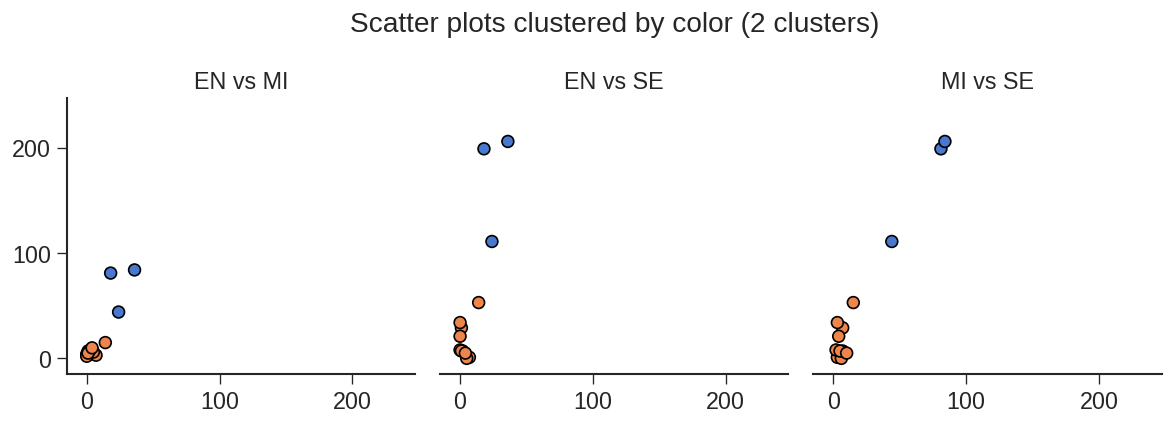

In [6]:
#----- Defining Estimators and fitting them to the data -----#
fitted_model = AgglomerativeClustering(n_clusters = 2, linkage = 'ward').fit(scaled_df)

#----- Set figure and Axis -----#

fig = plt.figure(figsize = (10, 4), dpi = 120)
gs = fig.add_gridspec(nrows = 1, ncols = 3)

ax = []
for i in range(1):
    for j in range(3):
        ax.append(fig.add_subplot(gs[i, j]))

        # Remove spines
        if j == 0:
            ax[-1].spines[['top', 'right']].set_visible(False)
        
        else:
            ax[-1].spines[['top', 'right', 'left']].set_visible(False)
            ax[-1].yaxis.set_tick_params(labelleft = False, left = False)
            
        ax[-1].set_xlim(-15, df.max().max()*1.2)
        ax[-1].set_ylim(-15, df.max().max()*1.2)
        
#----- Style -----#

plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

#----- Scatter plots -----#

titles = ['EN vs MI', 'EN vs SE', 'MI vs SE']
cols = [('EN', 'MI'), ('EN', 'SE'), ('MI', 'SE')]

big_axes = fig.add_subplot(gs[0, :])
big_axes.set_title('Scatter plots clustered by color (2 clusters)', pad = 40)
big_axes.set_axis_off()

for j in range(3):        
    sns.scatterplot(
        data = df,
        x = cols[j][0],
        y = cols[j][1],
        ax = ax[j],
        hue = fitted_model.labels_,
        legend = False,
        s = 50,
        linewidth = 1,
        edgecolor = 'black',
        palette = 'muted'
    )

    ax[j].set_title(titles[j], fontsize = 14)
    ax[j].set_xlabel('')
    ax[j].set_ylabel('')
        

#----- Show and/or save figure -----#

plt.tight_layout()
plt.savefig('images/hierarchical/scatter_plots_with_clusters.png', dpi = 120)

As expected from the [descriptive analysis](descriptive-analysis.ipynb), the job titles with few vacancies form a cluster, whereas the job titles with the most vacancies (outliers) form another cluster.

In [7]:
#----- Grouping by clusters -----#

df['Cluster'] = fitted_model.labels_ + 1
group_df = df.groupby('Cluster')
dw.display_side_by_side(group_df.get_group(1).describe().round(1), group_df.get_group(2).describe().round(1), titles = ['Cluster 1', 'Cluster 2'])

,EN,MI,SE,Cluster
count,3.0,3.0,3.0,3.0
mean,26.0,69.7,172.0,1.0
std,9.2,22.3,52.9,0.0
min,18.0,44.0,111.0,1.0
25%,21.0,62.5,155.0,1.0
50%,24.0,81.0,199.0,1.0
75%,30.0,82.5,202.5,1.0
max,36.0,84.0,206.0,1.0
,EN,MI,SE,Cluster
count,10.0,10.0,10.0,10.0


The job titles with the most vacancies form the **Cluster 1**, whereas the job titles with few vacancies form the **Cluster 2**. There are just three job titles in the Cluster 1: *data analyst*, *data scientist*, and *data engineer*. The job titles in the Cluster 1 are the most sought-after job titles since the means of all experience levels for this cluster are at least 7.6 times greater than the job title means in the Cluster 2. Essentialy, the Cluster 1 contains outliers, while the Cluster 2 contains all others job titles.